In [1]:
# Install yfinance if needed
!pip install yfinance --upgrade --quiet

In [2]:
# Import packages
import yfinance as yf
import pandas as pd

# Unified list of top 20 stocks
tickers = [
    'AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOGL',
    'META', 'TSLA', 'BRK-B', 'JPM', 'V',
    'SAP.DE', 'SIE.DE', 'ALV.DE', 'VOW3.DE', 'LIN.DE',
    'MC.PA', 'OR.PA', 'AIR.PA', 'ASML.AS', 'NESN.SW'
]

# Download data
data = yf.download(tickers,
                   start='2010-01-01',
                   end='2025-03-31',
                   group_by='ticker',
                   auto_adjust=False)

# Save each stock to CSV
for ticker in tickers:
    df = data[ticker].reset_index()
    filename = f'/content/{ticker}_2010_2025.csv'
    df.to_csv(filename, index=False)
    print(f'Saved: {filename}')

[*********************100%***********************]  20 of 20 completed


Saved: /content/AAPL_2010_2025.csv
Saved: /content/MSFT_2010_2025.csv
Saved: /content/NVDA_2010_2025.csv
Saved: /content/AMZN_2010_2025.csv
Saved: /content/GOOGL_2010_2025.csv
Saved: /content/META_2010_2025.csv
Saved: /content/TSLA_2010_2025.csv
Saved: /content/BRK-B_2010_2025.csv
Saved: /content/JPM_2010_2025.csv
Saved: /content/V_2010_2025.csv
Saved: /content/SAP.DE_2010_2025.csv
Saved: /content/SIE.DE_2010_2025.csv
Saved: /content/ALV.DE_2010_2025.csv
Saved: /content/VOW3.DE_2010_2025.csv
Saved: /content/LIN.DE_2010_2025.csv
Saved: /content/MC.PA_2010_2025.csv
Saved: /content/OR.PA_2010_2025.csv
Saved: /content/AIR.PA_2010_2025.csv
Saved: /content/ASML.AS_2010_2025.csv
Saved: /content/NESN.SW_2010_2025.csv


'AAPL',      # Apple (US)
'MSFT',      # Microsoft (US)
'NVDA',      # Nvidia (US)
'AMZN',      # Amazon (US)
'GOOGL',     # Alphabet/Google (US)
'META',      # Meta/Facebook (US)
'TSLA',      # Tesla (US)
'BRK-B',     # Berkshire Hathaway (US)
'JPM',       # JPMorgan Chase (US)
'V',         # Visa (US)

'SAP.DE',    # SAP (Germany)
'SIE.DE',    # Siemens (Germany)
'ALV.DE',    # Allianz (Germany)
'VOW3.DE',   # Volkswagen (Germany)
'LIN.DE',    # Linde (Germany/UK)

'MC.PA',     # LVMH (France)
'OR.PA',     # L'Oréal (France)
'AIR.PA',    # Airbus (France/Germany)
'ASML.AS',   # ASML Holding (Netherlands)
'NESN.SW'    # Nestlé (Switzerland)

In [3]:
#data cleaning
import glob
import os

# Input folder = /content/
input_folder = '/content/'
output_folder = '/content/processed/'
os.makedirs(output_folder, exist_ok=True)

# Find all CSVs
csv_files = glob.glob(input_folder + '*_2010_2025.csv')

# Clean each CSV
for file in csv_files:
    df = pd.read_csv(file)

    # Convert date
    df['Date'] = pd.to_datetime(df['Date'])

    # Sort and drop NA
    df = df.sort_values('Date')
    df = df.dropna()

    # Keep columns
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

    # Save
    ticker_name = os.path.basename(file)
    output_file = os.path.join(output_folder, ticker_name.replace('.csv', '_clean.csv'))
    df.to_csv(output_file, index=False)

    print(f"Saved cleaned file: {output_file}")

Saved cleaned file: /content/processed/VOW3.DE_2010_2025_clean.csv
Saved cleaned file: /content/processed/ALV.DE_2010_2025_clean.csv
Saved cleaned file: /content/processed/JPM_2010_2025_clean.csv
Saved cleaned file: /content/processed/NVDA_2010_2025_clean.csv
Saved cleaned file: /content/processed/AAPL_2010_2025_clean.csv
Saved cleaned file: /content/processed/AMZN_2010_2025_clean.csv
Saved cleaned file: /content/processed/META_2010_2025_clean.csv
Saved cleaned file: /content/processed/SIE.DE_2010_2025_clean.csv
Saved cleaned file: /content/processed/BRK-B_2010_2025_clean.csv
Saved cleaned file: /content/processed/GOOGL_2010_2025_clean.csv
Saved cleaned file: /content/processed/MC.PA_2010_2025_clean.csv
Saved cleaned file: /content/processed/SAP.DE_2010_2025_clean.csv
Saved cleaned file: /content/processed/V_2010_2025_clean.csv
Saved cleaned file: /content/processed/TSLA_2010_2025_clean.csv
Saved cleaned file: /content/processed/OR.PA_2010_2025_clean.csv
Saved cleaned file: /content/pr

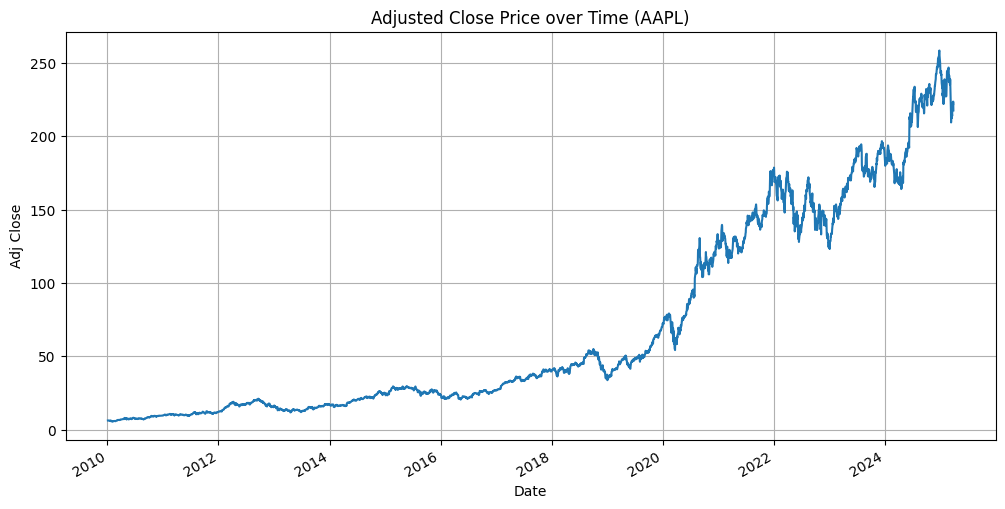

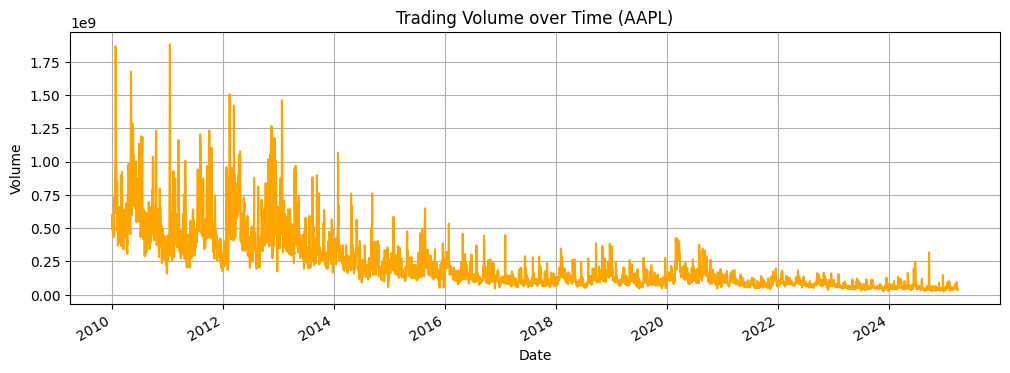

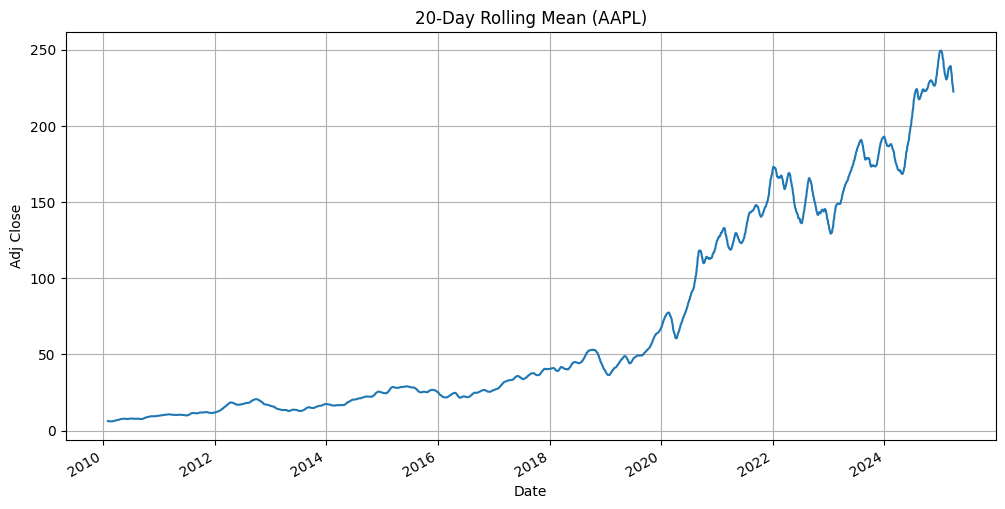

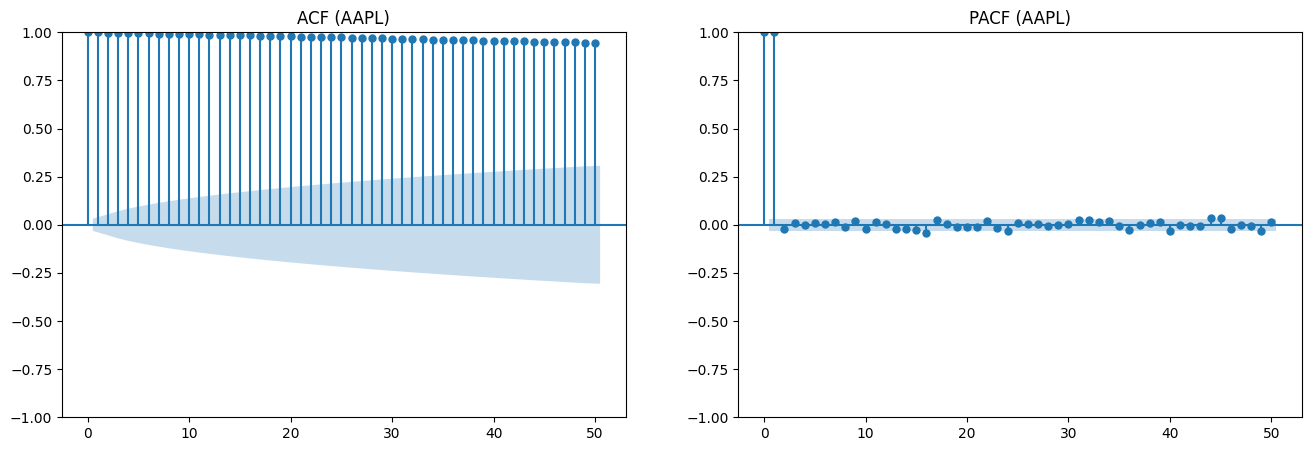

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example: Load one processed file (example: AAPL)
df = pd.read_csv('/content/processed/AAPL_2010_2025_clean.csv')

# Convert Date column and set index
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Plot 1: Adjusted Close over time
plt.figure(figsize=(12, 6))
df['Adj Close'].plot()
plt.title('Adjusted Close Price over Time (AAPL)')
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.grid()
plt.show()

# Plot 2: Volume over time
plt.figure(figsize=(12, 4))
df['Volume'].plot(color='orange')
plt.title('Trading Volume over Time (AAPL)')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.grid()
plt.show()

# Plot 3: Rolling mean (20 days)
plt.figure(figsize=(12, 6))
df['Adj Close'].rolling(window=20).mean().plot()
plt.title('20-Day Rolling Mean (AAPL)')
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.grid()
plt.show()

# Plot 4: ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(df['Adj Close'], lags=50, ax=axes[0])
plot_pacf(df['Adj Close'], lags=50, ax=axes[1])
axes[0].set_title('ACF (AAPL)')
axes[1].set_title('PACF (AAPL)')
plt.show()


# Comments
Adjusted Close trend: strong upward trend, we need models that handle the trend

The series is non-stationary, we must calculate returns or difference the series

Volume is declining, it could be used as a feature in LSTM or to explain volatility

Rolling mean is a useful baseline model to compare performance

ACF and PACF show autocorrelation, this helps choose the ARIMA order after differencing

There are volatility clusters, GARCH models can model and forecast this

VOW3.DE: Baseline Moving Avg RMSE = 5.40
NESN.SW: Baseline Moving Avg RMSE = 4.10
AIR.PA: Baseline Moving Avg RMSE = 4.84
LIN.DE: Baseline Moving Avg RMSE = 13.90
V: Baseline Moving Avg RMSE = 15.22
SAP.DE: Baseline Moving Avg RMSE = 15.12
MC.PA: Baseline Moving Avg RMSE = 44.36
OR.PA: Baseline Moving Avg RMSE = 11.70
BRK-B: Baseline Moving Avg RMSE = 17.00
MSFT: Baseline Moving Avg RMSE = 15.41
AAPL: Baseline Moving Avg RMSE = 13.67
TSLA: Baseline Moving Avg RMSE = 49.03
AMZN: Baseline Moving Avg RMSE = 13.81
GOOGL: Baseline Moving Avg RMSE = 10.37
SIE.DE: Baseline Moving Avg RMSE = 11.49
ALV.DE: Baseline Moving Avg RMSE = 12.77
ASML.AS: Baseline Moving Avg RMSE = 32.29
JPM: Baseline Moving Avg RMSE = 17.69
META: Baseline Moving Avg RMSE = 53.05
NVDA: Baseline Moving Avg RMSE = 10.18

=== Baseline RMSE Summary ===
VOW3.DE: 5.40
NESN.SW: 4.10
AIR.PA: 4.84
LIN.DE: 13.90
V: 15.22
SAP.DE: 15.12
MC.PA: 44.36
OR.PA: 11.70
BRK-B: 17.00
MSFT: 15.41
AAPL: 13.67
TSLA: 49.03
AMZN: 13.81
GOOGL: 1

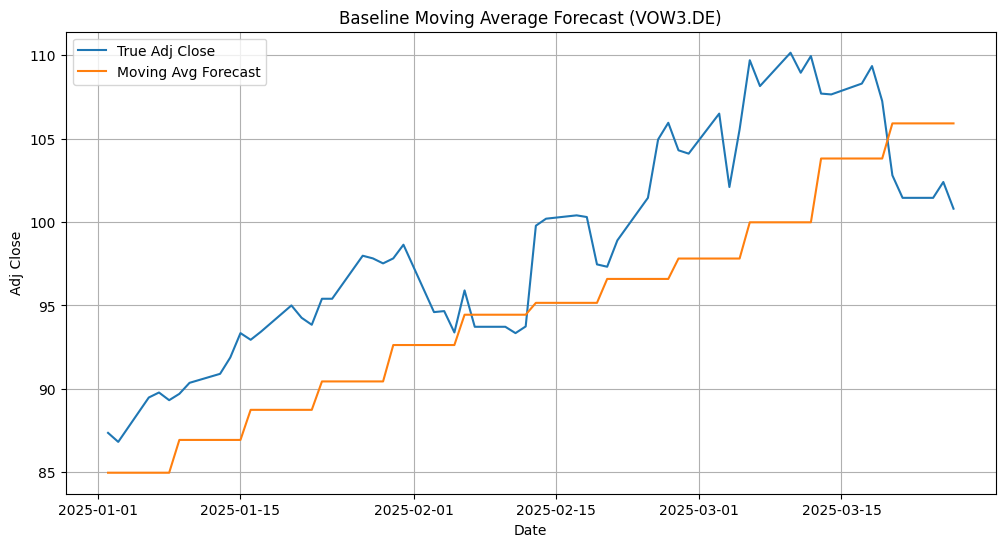

In [5]:
from sklearn.metrics import mean_squared_error

# Parameters
window_size = 20   # Moving average window
forecast_horizon = 5  # Forecast next 5 days

# Get all processed files
csv_files = glob.glob('/content/processed/*_clean.csv')

# For results
rmse_results = {}

# Loop over all stocks
for file in csv_files:
    ticker = os.path.basename(file).replace('_2010_2025_clean.csv', '')

    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)

    # Train-test split
    train_end = '2024-12-31'
    train_df = df.loc[:train_end]
    test_df = df.loc['2025-01-01':]

    predictions = []
    true_values = []

    # Rolling forecast over test set
    for i in range(0, len(test_df) - forecast_horizon + 1, forecast_horizon):
        history = pd.concat([train_df['Adj Close'], test_df['Adj Close'].iloc[:i]])
        moving_avg = history[-window_size:].mean()

        pred = [moving_avg] * forecast_horizon
        true = test_df['Adj Close'].iloc[i:i + forecast_horizon].values

        predictions.extend(pred)
        true_values.extend(true)

    predictions = np.array(predictions)
    true_values = np.array(true_values)

    # Compute RMSE
    if len(predictions) > 0 and len(true_values) > 0:
        rmse = np.sqrt(mean_squared_error(true_values, predictions))
        rmse_results[ticker] = rmse
        print(f'{ticker}: Baseline Moving Avg RMSE = {rmse:.2f}')
    else:
        print(f'{ticker}: Not enough test data to evaluate.')

# Final summary
print('\n=== Baseline RMSE Summary ===')
for ticker, rmse in rmse_results.items():
    print(f'{ticker}: {rmse:.2f}')

# plot example stock (first one)
example_file = csv_files[0]
example_ticker = os.path.basename(example_file).replace('_2010_2025_clean.csv', '')

df = pd.read_csv(example_file)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

train_df = df.loc[:train_end]
test_df = df.loc['2025-01-01':]

predictions = []
true_values = []

for i in range(0, len(test_df) - forecast_horizon + 1, forecast_horizon):
    history = pd.concat([train_df['Adj Close'], test_df['Adj Close'].iloc[:i]])
    moving_avg = history[-window_size:].mean()

    pred = [moving_avg] * forecast_horizon
    true = test_df['Adj Close'].iloc[i:i + forecast_horizon].values

    predictions.extend(pred)
    true_values.extend(true)

predictions = np.array(predictions)
true_values = np.array(true_values)

plt.figure(figsize=(12, 6))
plt.plot(test_df.index[:len(true_values)], true_values, label='True Adj Close')
plt.plot(test_df.index[:len(predictions)], predictions, label='Moving Avg Forecast')
plt.title(f'Baseline Moving Average Forecast ({example_ticker})')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.grid()
plt.show()


VOW3.DE: XGBoost RMSE = 2.02
NESN.SW: XGBoost RMSE = 1.29
AIR.PA: XGBoost RMSE = 5.21
LIN.DE: XGBoost RMSE = 7.34
V: XGBoost RMSE = 28.63
SAP.DE: XGBoost RMSE = 24.75
MC.PA: XGBoost RMSE = 13.79
OR.PA: XGBoost RMSE = 5.71
BRK-B: XGBoost RMSE = 25.00
MSFT: XGBoost RMSE = 8.31
AAPL: XGBoost RMSE = 7.05
TSLA: XGBoost RMSE = 21.95
AMZN: XGBoost RMSE = 9.13
GOOGL: XGBoost RMSE = 8.20
SIE.DE: XGBoost RMSE = 30.35
ALV.DE: XGBoost RMSE = 29.39
ASML.AS: XGBoost RMSE = 17.42
JPM: XGBoost RMSE = 18.38
META: XGBoost RMSE = 70.67
NVDA: XGBoost RMSE = 5.64

=== XGBoost RMSE Summary ===
VOW3.DE: 2.02
NESN.SW: 1.29
AIR.PA: 5.21
LIN.DE: 7.34
V: 28.63
SAP.DE: 24.75
MC.PA: 13.79
OR.PA: 5.71
BRK-B: 25.00
MSFT: 8.31
AAPL: 7.05
TSLA: 21.95
AMZN: 9.13
GOOGL: 8.20
SIE.DE: 30.35
ALV.DE: 29.39
ASML.AS: 17.42
JPM: 18.38
META: 70.67
NVDA: 5.64


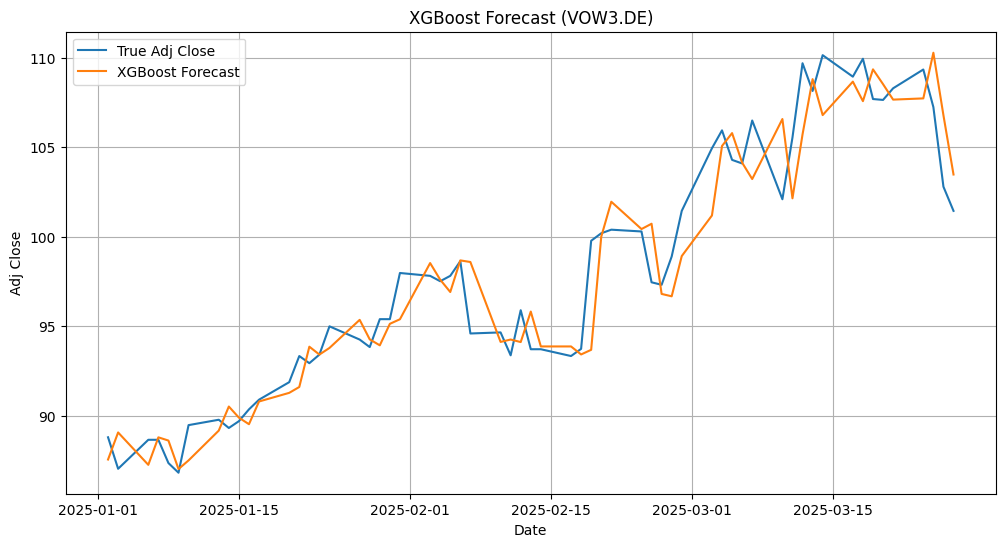

In [6]:
from xgboost import XGBRegressor

# Parameters
window_size = 20    # past 20 days as features
forecast_horizon = 5  # predict next 5 days

# Get all processed files
csv_files = glob.glob('/content/processed/*_clean.csv')

# For results
xgb_rmse_results = {}

# Loop over all stocks
for file in csv_files:
    ticker = os.path.basename(file).replace('_2010_2025_clean.csv', '')

    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)

    # Create features and target
    X = []
    y = []
    dates = []

    for i in range(window_size, len(df) - forecast_horizon):
        features = []

        # past window_size Adj Close
        features.extend(df['Adj Close'].iloc[i - window_size:i].values)

        # past window_size Volume (optional)
        features.extend(df['Volume'].iloc[i - window_size:i].values)

        target = df['Adj Close'].iloc[i:i + forecast_horizon].values  # next 5 days

        X.append(features)
        y.append(target)
        dates.append(df.index[i + forecast_horizon - 1])  # label the target by last day in horizon

    X = np.array(X)
    y = np.array(y)
    dates = np.array(dates)

    # Train/test split
    split_date = pd.to_datetime('2024-12-31')
    train_idx = dates < split_date
    test_idx = dates >= pd.to_datetime('2025-01-01')

    X_train = X[train_idx]
    y_train = y[train_idx]

    X_test = X[test_idx]
    y_test = y[test_idx]
    test_dates = dates[test_idx]

    if len(X_test) == 0:
        print(f'{ticker}: Not enough test data')
        continue

    # Model
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    model.fit(X_train, y_train[:, 0])  # we predict t+1, for simplicity

    # Predict rolling 5-day
    predictions = []
    true_values = []

    for i in range(0, len(X_test), forecast_horizon):
        X_batch = X_test[i:i + forecast_horizon]
        y_batch = y_test[i:i + forecast_horizon, 0]  # predict only t+1 horizon

        y_pred = model.predict(X_batch)

        predictions.extend(y_pred)
        true_values.extend(y_batch)

    predictions = np.array(predictions)
    true_values = np.array(true_values)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    xgb_rmse_results[ticker] = rmse
    print(f'{ticker}: XGBoost RMSE = {rmse:.2f}')

# Final summary
print('\n=== XGBoost RMSE Summary ===')
for ticker, rmse in xgb_rmse_results.items():
    print(f'{ticker}: {rmse:.2f}')

# Optional: plot example stock (first one)
example_file = csv_files[0]
example_ticker = os.path.basename(example_file).replace('_2010_2025_clean.csv', '')

df = pd.read_csv(example_file)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Features and target
X = []
y = []
dates = []

for i in range(window_size, len(df) - forecast_horizon):
    features = []
    features.extend(df['Adj Close'].iloc[i - window_size:i].values)
    features.extend(df['Volume'].iloc[i - window_size:i].values)

    target = df['Adj Close'].iloc[i:i + forecast_horizon].values

    X.append(features)
    y.append(target)
    dates.append(df.index[i + forecast_horizon - 1])

X = np.array(X)
y = np.array(y)
dates = np.array(dates)

train_idx = dates < split_date
test_idx = dates >= pd.to_datetime('2025-01-01')

X_train = X[train_idx]
y_train = y[train_idx]

X_test = X[test_idx]
y_test = y[test_idx]
test_dates = dates[test_idx]

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train[:, 0])

predictions = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(test_dates[:len(predictions)], y_test[:, 0], label='True Adj Close')
plt.plot(test_dates[:len(predictions)], predictions, label='XGBoost Forecast')
plt.title(f'XGBoost Forecast ({example_ticker})')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.grid()
plt.show()


In [7]:
!pip install lightgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3787, number of used features: 40
[LightGBM] [Info] Start training from score 95.300097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3747, number of used features: 40
[LightGBM] [Info] Start training from score 67.000718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 40
[LightGBM] [Info] Start training from score 71.018550
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3787, number of used features: 40
[LightGBM] [Info] Start training from score 140.351706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3749, number of used features: 40
[LightGBM] [Info] Start training from score 119.657830
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3787, number of used features: 40
[LightGBM] [Info] Start training from score 80.862053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 40
[LightGBM] [Info] Start training from score 300.952409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 40
[LightGBM] [Info] Start training from score 197.477865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3749, number of used features: 40
[LightGBM] [Info] Start training from score 193.292014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3749, number of used features: 40
[LightGBM] [Info] Start training from score 129.510664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3749, number of used features: 40
[LightGBM] [Info] Start training from score 67.510351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3627, number of used features: 40
[LightGBM] [Info] Start training from score 81.480997
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3749, number of used features: 40
[LightGBM] [Info] Start training from score 71.588501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3749, number of used features: 40
[LightGBM] [Info] Start training from score 61.149840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3787, number of used features: 40
[LightGBM] [Info] Start training from score 82.025665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3787, number of used features: 40
[LightGBM] [Info] Start training from score 123.484503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3815, number of used features: 40
[LightGBM] [Info] Start training from score 241.624435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3749, number of used features: 40
[LightGBM] [Info] Start training from score 81.035825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

JPM: LightGBM RMSE = 18.58


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3150, number of used features: 40
[LightGBM] [Info] Start training from score 184.993807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

META: LightGBM RMSE = 61.60


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3749, number of used features: 40
[LightGBM] [Info] Start training from score 13.883969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 3787, number of used features: 40
[LightGBM] [Info] Start training from score 95.300097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


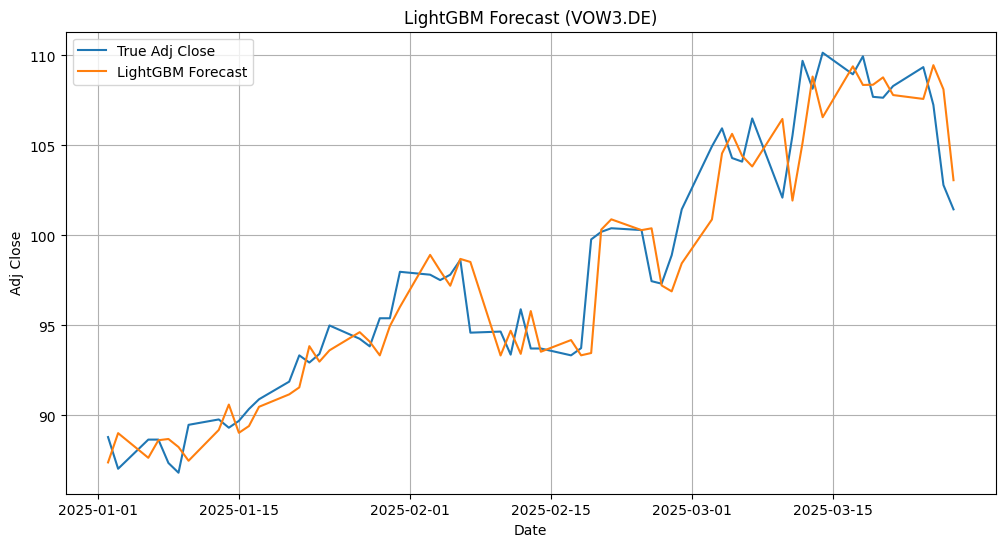

In [8]:
import lightgbm as lgb

# Parameters
window_size = 20    # past 20 days as features
forecast_horizon = 5  # predict next 5 days

# Get all processed files
csv_files = glob.glob('/content/processed/*_clean.csv')

# For results
lgb_rmse_results = {}

# Loop over all stocks
for file in csv_files:
    ticker = os.path.basename(file).replace('_2010_2025_clean.csv', '')

    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)

    # Create features and target
    X = []
    y = []
    dates = []

    for i in range(window_size, len(df) - forecast_horizon):
        features = []

        # past window_size Adj Close
        features.extend(df['Adj Close'].iloc[i - window_size:i].values)

        # past window_size Volume
        features.extend(df['Volume'].iloc[i - window_size:i].values)

        target = df['Adj Close'].iloc[i:i + forecast_horizon].values  # next 5 days

        X.append(features)
        y.append(target)
        dates.append(df.index[i + forecast_horizon - 1])  # label by last day in horizon

    X = np.array(X)
    y = np.array(y)
    dates = np.array(dates)

    # Train/test split
    split_date = pd.to_datetime('2024-12-31')
    train_idx = dates < split_date
    test_idx = dates >= pd.to_datetime('2025-01-01')

    X_train = X[train_idx]
    y_train = y[train_idx]

    X_test = X[test_idx]
    y_test = y[test_idx]
    test_dates = dates[test_idx]

    if len(X_test) == 0:
        print(f'{ticker}: Not enough test data')
        continue

    # Model
    model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    model.fit(X_train, y_train[:, 0])  # predict t+1 horizon

    # Predict rolling 5-day
    predictions = []
    true_values = []

    for i in range(0, len(X_test), forecast_horizon):
        X_batch = X_test[i:i + forecast_horizon]
        y_batch = y_test[i:i + forecast_horizon, 0]

        y_pred = model.predict(X_batch)

        predictions.extend(y_pred)
        true_values.extend(y_batch)

    predictions = np.array(predictions)
    true_values = np.array(true_values)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    lgb_rmse_results[ticker] = rmse
    print(f'{ticker}: LightGBM RMSE = {rmse:.2f}')

# Final summary
print('\n=== LightGBM RMSE Summary ===')
for ticker, rmse in lgb_rmse_results.items():
    print(f'{ticker}: {rmse:.2f}')

# Optional: plot example stock (first one)
example_file = csv_files[0]
example_ticker = os.path.basename(example_file).replace('_2010_2025_clean.csv', '')

df = pd.read_csv(example_file)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

X = []
y = []
dates = []

for i in range(window_size, len(df) - forecast_horizon):
    features = []
    features.extend(df['Adj Close'].iloc[i - window_size:i].values)
    features.extend(df['Volume'].iloc[i - window_size:i].values)

    target = df['Adj Close'].iloc[i:i + forecast_horizon].values

    X.append(features)
    y.append(target)
    dates.append(df.index[i + forecast_horizon - 1])

X = np.array(X)
y = np.array(y)
dates = np.array(dates)

train_idx = dates < split_date
test_idx = dates >= pd.to_datetime('2025-01-01')

X_train = X[train_idx]
y_train = y[train_idx]

X_test = X[test_idx]
y_test = y[test_idx]
test_dates = dates[test_idx]

model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train[:, 0])

predictions = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(test_dates[:len(predictions)], y_test[:, 0], label='True Adj Close')
plt.plot(test_dates[:len(predictions)], predictions, label='LightGBM Forecast')
plt.title(f'LightGBM Forecast ({example_ticker})')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.grid()
plt.show()



=== Model RMSE Comparison ===
          Baseline    XGBoost   LightGBM
NESN.SW   4.100714   1.292959   1.298414
VOW3.DE   5.396868   2.017563   2.082342
AIR.PA    4.842690   5.205194   4.623345
NVDA     10.182022   5.642773   5.243694
OR.PA    11.704858   5.711798   5.996118
LIN.DE   13.903133   7.336784   5.709996
GOOGL    10.374431   8.201234   8.380094
AAPL     13.668557   7.048939   8.746198
MSFT     15.413076   8.306937   9.076409
AMZN     13.813705   9.127941   9.925643
JPM      17.688584  18.375922  18.582764
BRK-B    17.002236  25.003696  22.820355
SAP.DE   15.122636  24.751985  27.178916
ASML.AS  32.286197  17.424103  20.028394
SIE.DE   11.491758  30.349209  28.500194
ALV.DE   12.768096  29.388881  29.120206
V        15.222683  28.631765  27.739735
MC.PA    44.356906  13.791276  14.439333
TSLA     49.025781  21.950809  20.049981
META     53.051592  70.671959  61.599790

RMSE comparison saved to /content/rmse_comparison.csv


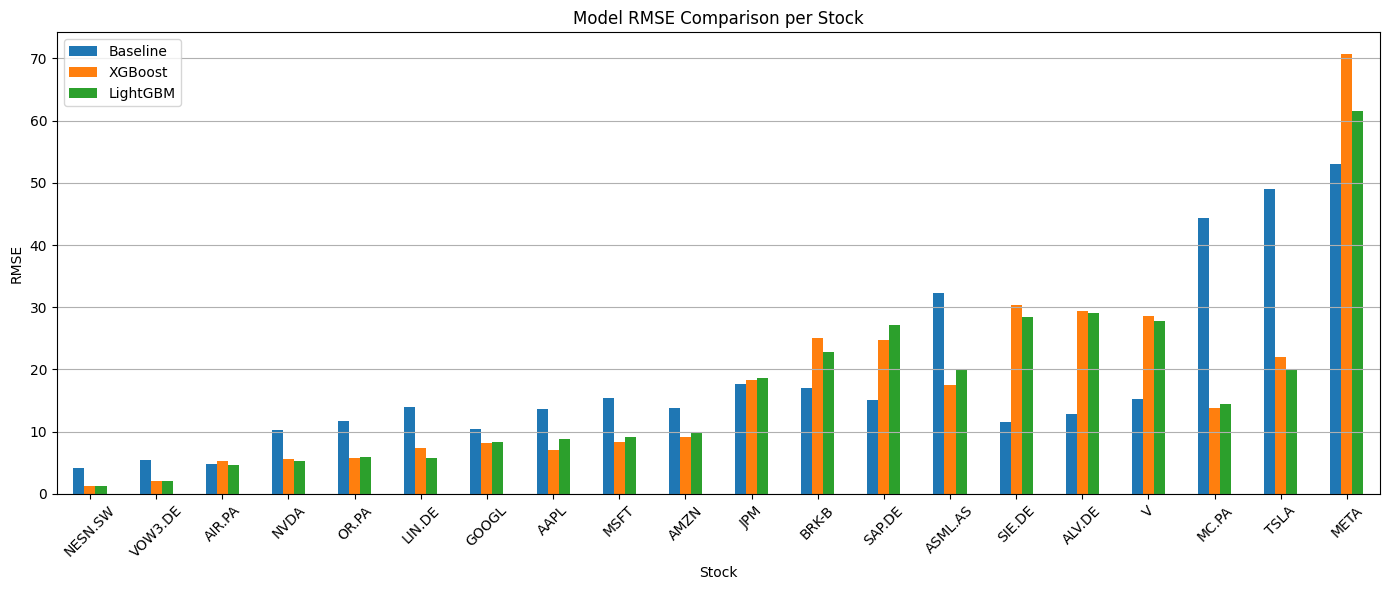

In [11]:
# Combine RESULTS into dataframe for comparison
comparison_df = pd.DataFrame({
    'Baseline': pd.Series(rmse_results),
    'XGBoost': pd.Series(xgb_rmse_results),
    'LightGBM': pd.Series(lgb_rmse_results)
})

# Sort by average RMSE (optional)
comparison_df['Avg_RMSE'] = comparison_df.mean(axis=1)
comparison_df = comparison_df.sort_values('Avg_RMSE')

# Print the table
print('\n=== Model RMSE Comparison ===')
print(comparison_df[['Baseline', 'XGBoost', 'LightGBM']])

# Save to CSV
comparison_df[['Baseline', 'XGBoost', 'LightGBM']].to_csv('/content/rmse_comparison.csv')
print('\nRMSE comparison saved to /content/rmse_comparison.csv')

# Barplot
comparison_df[['Baseline', 'XGBoost', 'LightGBM']].plot(kind='bar', figsize=(14, 6))
plt.title('Model RMSE Comparison per Stock')
plt.ylabel('RMSE')
plt.xlabel('Stock')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()
